<a href="https://colab.research.google.com/github/maviverosp/PUC-Rio/blob/main/Machine_Learning_com_fuzzy_e_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Vamos a montar un Sistema Fuzzy (Fuzzy Control System)

Para utilizar la lógica difusa en sistemas de machine learning, necesitamos construir un sistema denominado Fuzzy Control System, que básicamente consiste en un sistema que utiliza lógica difusa.
Ante de comenzar, no olvidar las reglas de conjuntos

Ou, O: es unión entonces se elige el valor maximo de pertennecia.

E, Y: es condicional se elige el menor

Estructura Fuzzy

1. Entrada y Salida Crisp: Cada variable difusa posee un valor llamado valor crisp, que simplemente es un número que está dentro de un dominio predeterminado. El dominio en lógica difusa se llama Universo, el cual define los valores en los que se encuentran las variables. Por ejemplo, la altura de una persona con un universo para la variable estaría en el intervalo de 1.20 a 2.00 metros.
2. Fuzzificación: Es la primera etapa del sistema de control difuso. Esta etapa consiste en transformar un valor crisp de la entrada en un valor difuso, para lo cual necesitamos definir los términos y funciones de pertenencia para este sistema:
    - 2.1. Término: Una variable difusa puede tener diversos términos que se utilizan para describirla. Todos estos términos componen el llamado conjunto difuso y son utilizados para definir cuál será el valor difuso de esa variable. Ejemplos de términos podrían ser: bajo, medio y alto.
    - 2.2. Funciones de pertenencia: Cada término tiene una función de pertenencia que define cómo el valor crisp será mapeado, considerando una escala que varía de 0 a 1. La función define el pertenecimiento de un determinado elemento a un conjunto.

3. Inferencia Difusa: En este paso, analizamos las reglas definidas en el paso anterior con las entradas difusas según las funciones de pertinencia del paso de fuzzificación para encontrar la región resultante del consecuente.Existen varias técnicas de inferencia difusa, pero la más utilizada es el método **Mamdani**. El primer paso en la inferencia difusa mediante el método de Mamdami consiste en proporcionar los grados de pertinencia de cada variable (según los conjuntos difusos) para las reglas que componen el sistema y hallar así la región resultante para el consecuente (que en nuestro caso es la talla de la prenda). Esto se explicará mejor en el siguiente ejercicio.
4. Reglas Difusas: Las reglas se utilizan para conectar diferentes variables difusas de modo que describen cómo una o más variables difusas están relacionadas entre sí. Estas reglas se expresan mediante declaraciones de IF/THEN; "IF" es llamado antecedente y la parte "THEN" es llamada consecuente. Por ejemplo: **Si** la estatura es mediana OU/O peso es medío **ENTONCES** tamaño es medio.
5. Defuzzificación: Existen cuatro métodos de defuzzificación: Centroide, Media de los Máximos, Mínimos de los Máximos y Máximos de los Máximos.
    a.Centroide: Es una fórmula aplicable a valores discretos y continuos.
    b. Media de los Máximos
    c. Mínimos de los Máximos
    d. Máximos de los Máximos



Ejercicio N° 3: Machine Learning com fuzzy e python
1. Para combinar los modelos de lógica difusa con Python, utilizamos el paquete scikit-fuzzy. En la documentación, tenemos un ejemplo de su aplicación a un problema de propinas (en el que, dada la calidad del servicio y el plato pedido, se quiere saber cuánto dar de propina). Como este ejemplo ya está bien explicado, imaginemos aquí otro caso para ilustrar y ver la aplicación de la lógica difusa en otro escenario.

- Imaginemos que tenemos dos modelos: un modelo de regresión que predice el valor de una propiedad (como en el famoso concurso de Kaggle) y un modelo de clasificación que predice la probabilidad de que una propiedad se venda. Entonces podríamos combinar estos dos modelos para decir lo buena que es una propiedad:

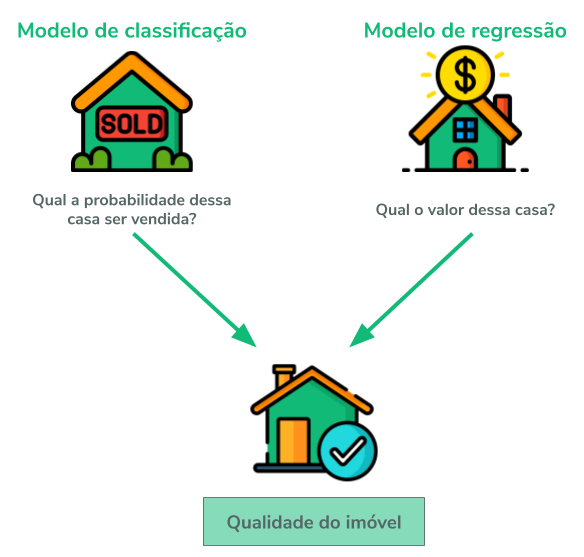

Ahora que ya conocemos los conceptos de un sistema de control difuso, vamos a aplicarlos paso a paso al caso anterior para crear un sistema que nos devuelva la calidad de una propiedad. En primer lugar, definamos las entradas y salidas de nuestro sistema:

##Entradas
###Valor
Universo (intervalo de valores crisp): ¿cuál es el precio del inmueble, considerando una escala entre 100.000 reales - $1.000.000 reales?

Conjunto difuso (rango de valores difusos): bajo, medio y alto

###Venta
Universo: dado un valor entre 0 y 1, ¿cuál es la probabilidad de que la propiedad se venda?

Conjunto difuso: baja, media y alta

###Salida
Calidad
Universo: ¿cuál es la calidad de la propiedad, en una escala entre 0 y 100?

Conjunto difuso: mala, media y buena.

Pasemos ahora todas estas definiciones a Python usando scikit-fuzzy:

In [ ]:
!pip install -U scikit-fuzzy #Libreria de Fuzzy

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

#Definición de los UNIVERSOS
#Antecedentes, que seran las predicciones indicando la probabilidad del inmueble de ser vendido y su valor.

venda = ctrl.Antecedent(np.arange(0, 1.01, .01), "venda")
preco = ctrl.Antecedent(np.arange(100000,1001000,1000), "preco")

#Consecuentes, que será la calidad de inmueble.
qualidade = ctrl.Consequent(np.arange(0,100.1, .1), "qualidade")
"""Utilizamos el módulo de control que tiene las clases Antecedente y Consecuente para definir las variables de entrada y salida respectivamente.
Estas clases reciben como parámetros el universo y la etiqueta con el nombre de la variable. El universo debe ser un array de valores posibles (no sólo los valores mínimo y máximo). Por eso utilizamos la función arange de numpy para generar este array.
En esta función proporcionamos 3 parámetros: el valor inicial, el valor final y el paso, pero es importante decir que el valor final no se incluirá en el array (por eso en el código los valores finales de cada variable son mayores que lo que definimos en el universo).

Después de esta definición inicial, vamos a definir las funciones de pertinencia para el antecedente y el consecuente:"""




'Utilizamos el módulo de control que tiene las clases Antecedente y Consecuente para definir las variables de entrada y salida respectivamente. \nEstas clases reciben como parámetros el universo y la etiqueta con el nombre de la variable. El universo debe ser un array de valores posibles (no sólo los valores mínimo y máximo). Por eso utilizamos la función arange de numpy para generar este array. \nEn esta función proporcionamos 3 parámetros: el valor inicial, el valor final y el paso, pero es importante decir que el valor final no se incluirá en el array (por eso en el código los valores finales de cada variable son mayores que lo que definimos en el universo).\n\nDespués de esta definición inicial, vamos a definir las funciones de pertinencia para el antecedente y el consecuente:'

'En el código anterior, elegimos arbitrariamente las funciones de pertinencia de las variables. Para las ventas y el precio, \noptamos por la función triangular (definida con la función **trimf**), mientras que la calidad se definió con la función trapezoidal\n(con la función **trapmf**). \nAmbas recibían dos argumentos: el universo de variables que definimos en el código anterior y un array\npara definir la forma de los triángulos y trapecios (para la función triangular, el array debe tener 3 elementos, mientras que\npara la **trapezoidal necesita tener 4**). Los valores de estas matrices que definen las formas también se eligieron empíricamente.\n\nEn el código anterior también utilizamos la función view, que nos permite visualizar las funciones de pertinencia definidas para \ncada antecedente y consecuente:'

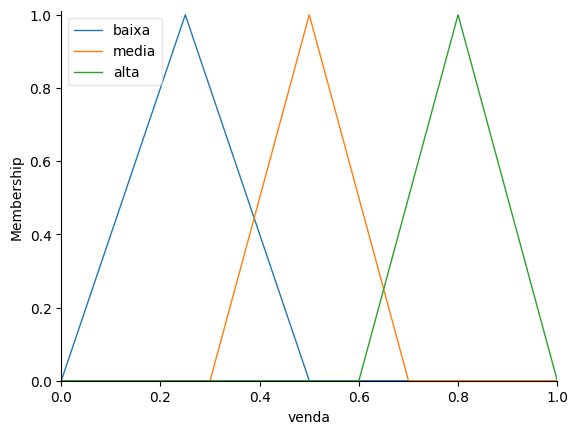

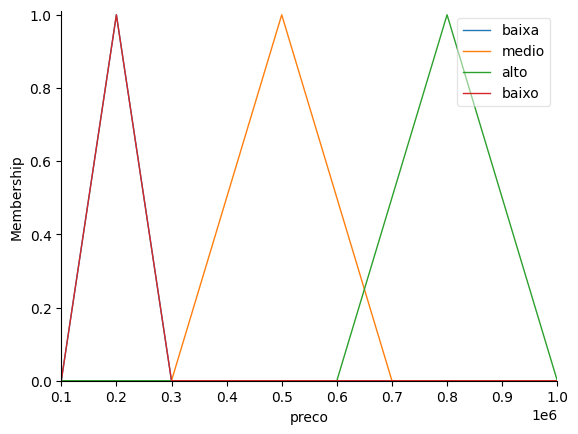

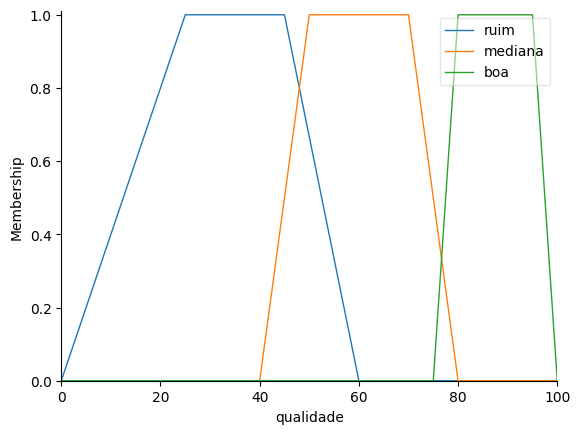

In [ ]:
#Definiciones de las funciones de Pertinencia
#Venda
venda["baixa"] = fuzz.trimf(venda.universe, [0, 0.25, 0.5])
venda["media"] = fuzz.trimf(venda.universe, [0.3, 0.5, 0.7])
venda["alta"] = fuzz.trimf(venda.universe, [0.6, 0.8, 1])

#Preco
preco["baixo"] = fuzz.trimf(preco.universe, [100000, 200000, 300000])
preco["medio"] = fuzz.trimf(preco.universe, [300000, 500000, 700000])
preco["alto"] = fuzz.trimf(preco.universe, [600000, 800000, 1000000])

#qualidade
qualidade["ruim"] = fuzz.trapmf(qualidade.universe, [0, 25, 45, 60])
qualidade["mediana"] = fuzz.trapmf(qualidade.universe, [40, 50, 70, 80])
qualidade["boa"] = fuzz.trapmf(qualidade.universe, [75, 80, 95, 100])

#Visualización de las funciones de pertinencia
#Venda
venda.view()
#Preco
preco.view()
#Qualidade
qualidade.view()

"""En el código anterior, elegimos arbitrariamente las funciones de pertinencia de las variables. Para las ventas y el precio,
optamos por la función triangular (definida con la función **trimf**), mientras que la calidad se definió con la función trapezoidal
(con la función **trapmf**).
Ambas recibían dos argumentos: el universo de variables que definimos en el código anterior y un array
para definir la forma de los triángulos y trapecios (para la función triangular, el array debe tener 3 elementos, mientras que
para la **trapezoidal necesita tener 4**). Los valores de estas matrices que definen las formas también se eligieron empíricamente.

En el código anterior también utilizamos la función view, que nos permite visualizar las funciones de pertinencia definidas para
cada antecedente y consecuente:"""

In [ ]:
#Vamos a crear las Reglas de este Sistema de Control
#Regla 1: Si la probabilidad de venda es baja, entonces qualidade es ruim
regra1 = ctrl.Rule(venda['baixa'], qualidade['ruim'])

#Regla 2: Si la probabilidad de venda es media o el preco es medio, entonces qualidade es mediana
regra2 = ctrl.Rule(venda['media'] | preco['medio'], qualidade['mediana'])

#Regla 3: Si la probabilidad de venda es alta y el preco es alto, entao qualidade es boa
regra3 = ctrl.Rule(venda['alta'] & preco['alto'], qualidade['boa'])

#Regla 4: Si la probabildiad de venda es media O el preco es bajo, entonces la qualidade e mediana.
regra4 = ctrl.Rule(venda['media'] | preco['baixo'], qualidade['mediana'])

#Regla5: Si la probabilidad de venda es baixa Y el preco es alto, entonces qualidade es mediana.
regra5 = ctrl.Rule(venda['baixa'] & preco['alto'], qualidade['mediana'])

#Regla 4: Si proba. de venda es alta O el preco es baixo, entonces quealidade es alta
regra4 = ctrl.Rule(venda['alta'] | preco['baixo'], qualidade['boa']) #Por qué es regra 4 de nuevo?

imovel_ctrl = ctrl.ControlSystem([regra1, regra2, regra3, regra4, regra5])
engine = ctrl.ControlSystemSimulation(imovel_ctrl)
"""Podemos ver que se definieron 5 reglas para este sistema utilizando la clase Rule, para la que se le
pasaron dos parámetros: el antecedente (en el que para algunas reglas se utilizaron los operadores AND u OR para
relacionar dos variables de entrada) y el consecuente. De nuevo, estas reglas se eligieron empíricamente.
Tras definir las reglas, tenemos las líneas
16 y 17 del código anterior, en las que pasamos las reglas al sistema de control definido por la clase ControlSystem y,
para simular este sistema, creamos ControlSystemSimulation. Ahora que tenemos el sistema listo, podemos proporcionar
dos valores de entrada como ejemplo para comprobar cuál será la salida del sistema:"""

60.00000000000002


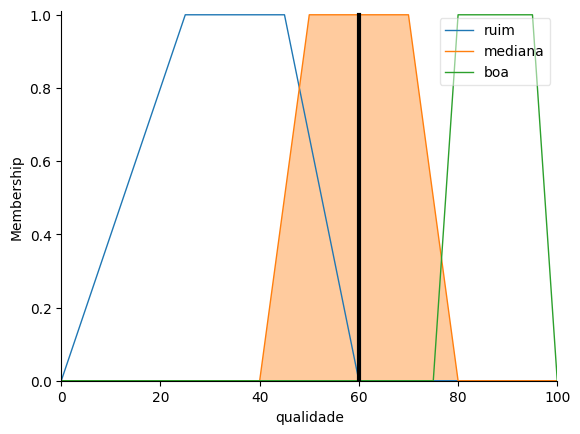

In [ ]:
#Pasar la predicciones de los moelos para sis respctivas variables de entrada
engine.input['venda'] = 0.5
engine.input['preco'] = 950000

#Calcula la salida del sitema de control fuzzy
engine.compute()

#Retorna el valor crisp y el gráfico mostrandolo
print(engine.output['qualidade'])
qualidade.view(sim=engine)

En el ejemplo anterior, proporcionamos como entrada una predicción del modelo de clasificación que devolvía que esta propiedad tiene una probabilidad del 80% de ser vendida, mientras que la predicción del modelo de regresión era que el valor de la propiedad es de 150.000,00 reales. A continuación, utilizamos la función computar para calcular la salida del sistema difuso. Es importante notar que estamos usando los parámetros por defecto de la librería para realizar los pasos de inferencia difusa y defuzzificación. Puedes revisar la documentación si deseas utilizar otros métodos para estos pasos. Como retorno para el ejemplo anterior, la impresión nos informa que la salida es igual a 60 y también tenemos el siguiente gráfico retornado:

Ahora vamos a suponer que los modelos hicieron predicciones para otra propiedad y devolvieron una predicción de ventas igual a 0,78 y un valor de la propiedad de R$ 680.000,00. Para este caso, el sistema devuelve un resultado de 79,37 y el siguiente gráfico:

Genial, ¡ahora tenemos resultados para dos propiedades! ¿Qué podemos hacer con ellas? Con las salidas del sistema de control difuso, sabemos que la segunda propiedad es de mayor calidad que la primera. Podríamos dar más importancia a esta segunda propiedad, ya que sabemos que es mejor y debería venderse más rápido, o podríamos hacer un descuento a la primera propiedad, ya que su calidad es inferior. En resumen, ¡hay muchas posibilidades de utilizar las salidas del sistema de control mediante lógica difusa! Ventajas e inconvenientes del uso de la lógica difusa Entre las ventajas que se pueden obtener del uso de la lógica difusa están las siguientes